# Image tutorial 图像教程
一个简短地教你使用Matplotlib绘制图像的教程

## 初始命令
首先，打开IPython。它是标准Python启动器的最优秀的增强版之一，尤其能够非常好地与Matplotlib配合使用。你可以直接在命令行中打开IPython，或者在Jupyter Notebook中使用它（这时IPython是一个后台运行的内核）。

IPython启动后，我们需要连接一个GUI事件循环，从而告诉IPython在哪里（以及怎样）呈现绘图结果。连接一个GUI事件循环的方法是在IPython启动器里执行**%matplotlib**魔术指令。关于这方面具体的细节详见IPython的文档[GUI event loops](https://ipython.readthedocs.io/en/stable/interactive/reference.html#gui-event-loop-support)。

如果你使用的是Jupyter Notebook，这个命令是同样有用的，但是一般来说还会再为%matplotlib魔术指令指定一个参数：

In [2]:
%matplotlib inline

这个命令会开启行内绘图，也就是说在你的Jupyter的笔记上展示绘制的图像。这条命令对于我们和绘图的交互有重要意义。如果我们开启了行内绘图，绘制的图像输出展示在某一行后，再它之后执行的命令并不会影响到它。举例来说，如果你先绘制了一张图像，然后在下一个格子的代码中才改变图像的颜色图，那么改变颜色图并不会影响已经完成的图像输出。但是对于其他Matplotlib后端，比如说Qt，我们生成的图像是在一个额外的窗口中打开的，此时在生成图像的命令执行之后再修改图像的属性则会影响我们的绘图——这些后端里的绘图对象是一直在活动的。

本教程会使用Matplotlib的命令行式的绘图接口，pyplot。这个接口会维护全局的状态，在我们想简单快速地试验各种不同的绘图设置时非常有用。你还可以选择另一种面向对象的接口，它同样非常强大，但一般更适合用于大型应用的开发。如果你想了解更多关于面向对象的接口的知识，推荐你从我们的[使用基础](https://matplotlib.org/stable/tutorials/introductory/usage.html)开始。不过现在，让我们回到命令行式接口：

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
import matplotlib
matplotlib.__version__

'3.5.1'

## 将图像导入为Numpy数组
Matplotlib在导入图像数据时依赖的是[Pillow](https://pillow.readthedocs.io/en/latest/)库。

下面是我们将会用到的图:

![stinkbug.png](stinkbug.png)

这是一张24位RGB的PNG图像（红R、绿G、蓝B通道各8位）。根据你获得数据的不同来源，图像的类型也不相同，其他你能最常碰到的类型是RGBA（也就是增加了一个透明度通道A）和单通道的灰阶（辉度）图像。在后面的教程中，我们都会使用[stingkbug.png](https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png)这张图。

让我们开始吧……

In [15]:
img = mpimg.imread(r'stinkbug.png')
print(img)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


注意这里的数据类型是float32。Matplotlib将各个通道8位的数据转换成了0.0到1.0之间的浮点数。这里要提一点背景知识，Pillow能够接受的数据类型只有uint8。Matplotlib能够处理float32和uint8的数据，但是除了PNG格式外，其他格式的图像的读写只支持uint8数据。为什么我们使用8位的图像？大部分显示技术都只支持处理每通道8位的颜色层次，为什么只支持8位/通道？因为这是几乎所有人类能分辨的颜色极限了。更多这方面的知识（从摄影角度）详见[Luminous Landscape bit depth tutorial](https://luminous-landscape.com/bit-depth/)。

图像数据中最内层的每个列表代表了一个像素。这个例子因为是RGB图像，所以列表里有三个值。又因为这是一张黑白的图像，所以R、G、B的值都很接近。如果是RGBA图像（这里的A是alpha，即透明度），列表里就会有4个值。如果是一张辉度图像的话，一个像素就只有一个值（这样的话图像就是一个2D数组，而不是3D数组）。对于RGB和RGBA图像，Matplotlib能支持float32和uint8的数据类型。对于灰阶图像，Matplotlib只支持float32。如果你的数据的类型不属于上面提到的这些，你需要做一些转换。

## 将numpy数组绘制为图像
就像我们上面做的一样，你的图像数据会变为一个numpy数组（这些数据可能是导入的，也可能是你自己生成的），现在让我们对它们进行呈现。在Matplotlib中，这个功能是通过`imshow()`函数来实现的。在下面的例子中，我们的操作都是围绕绘图函数返回的对象进行的，这个对象的存在能让我们更容易对绘图进行操作。

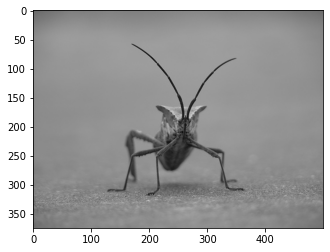

In [16]:
imgplot = plt.imshow(img)

你可以对任何numpy数组都进行这样的绘图。

### 在绘制图像时使用伪彩
伪彩是一种能让你增强图像对比度、可视化图像时更方便的工具。这尤其在你想要在投影仪上展示你的数据的时候非常有用——它们的对比度真的很差。

伪彩只适用于单通道、灰阶图像、辉度图像。我们这里用的图像是RGB图像。因为R、G、B三个通道的值都很接近（你可以在上面的数据中自己看一下），我们可以挑选其中任意一个通道来进行处理：

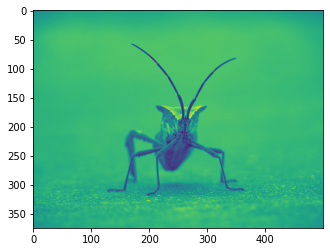

In [7]:
lum_img = img[:, :, 0]
# 这里用了数组切片，如果你不了解这一操作，可以参考Numpy教程：
# <https://numpy.org/doc/stable/user/quickstart.html>`_.

plt.imshow(lum_img)

现在我们得到了一张辉度图像（2D，没有颜色）。现在应用在上面的是默认的颜色图搭配（也就是查找表（LUT）转换）。这个默认的颜色图叫viridis。你还可以选择很多种其他的颜色图：

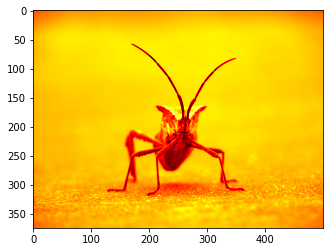

In [8]:
plt.imshow(lum_img, cmap='hot')

你也可以使用`set_cmap()`方法对已经存在的绘图对象的颜色图进行修改：

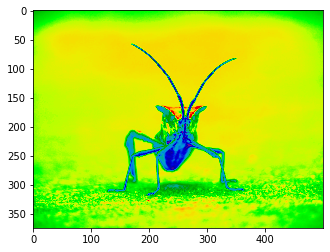

In [9]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

> 但是我们前面说过在行内绘图的Jupyter Notebook里，你不能对已经呈现到屏幕上的图像进行修改。如果你在一格代码里创建了imgplot, 在下一格的代码里使用set_cmap()就不能改变上一个格子里已经生成的图像。要确保你在同一个代码的输入格里输入这两行代码。plt命令同样也会对前面的代码格已经生成的图像产生改变。

你可以使用的配色方案还有其他很多种，详见[list and images of the colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)。

### 用于参照的颜色标尺
当你在看图像时，对什么样的值对应什么样的颜色有个概念是非常有帮助的。我们可以通过在图像旁边增加一个颜色栏来做到这一点：

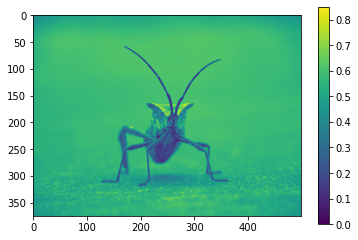

In [10]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

### 查看特定范围内的数据
有时候你可能会想要增强或扩大图像中某个特定范围内的对比度，同时牺牲一部分变化不大或不重要的颜色细节。一个找到这个感兴趣区的方法是使用直方图。我们可以使用`hist()`函数来绘制图像数据的直方图：

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

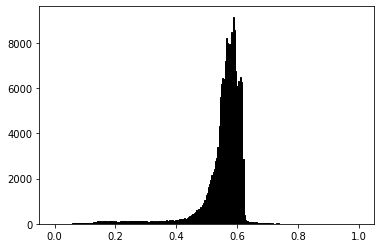

In [11]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

在大多数情况下，我们在图像中的感兴趣区都是在直方图的峰值附近的。你可以通过裁减比掉峰值高和（或）低的区域来增强对比度。在我们的直方图中，在像素值高的一边似乎没有多少有用的信息了（这张图中没有太多白色的物体）。让我们对图像的值的上限做一些调整，这样我们就可以更有效地聚焦于直方图的一部分。我们的做法是向`imshow`中传入`clim`参数。你也可以调用绘图对象的`set_clim()`方法，但是如果你是在Jupyter Notebook中使用的话，要确保它和绘图的代码在同一个代码框里，否则这个方法无法改变之前已经生成的绘图。

你可以在调用`plot`的时候指定`clim`的值：

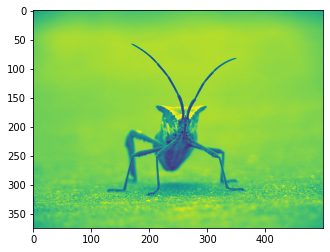

In [12]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

你也可以指定返回的对象的`clim`：

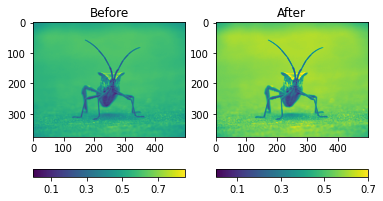

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

## 数组插值的模式
插值是按照不同的数学模式来计算某个像素点的值“应该”是多少的方法。我们在调整一个图像的大小时常常会用到它——这时图像的像素数量发生了变化，但你还是想要图像保留同样的信息。由于各个像素是离散的，图像调整之后就会有一些像素没有值。插值就是将这些没有值的像素填满的方法。这也是为什么你的图像有时在放大之后显得非常像素化，而且图像放得越大，这个效应就越明显。让我们把现在这张图像缩小一下，这是我们会去掉一些像素，只留图中的一部分像素。当我们绘制这张图是，这个图像的数据会调整到适合你屏幕的大小，但是由于有一些之前的像素已经被去掉了，计算机只能自己绘制一些像素来填满空缺的值。

我们这里会使用之前用来加载图像同时也可以调整图像大小的Pillow。

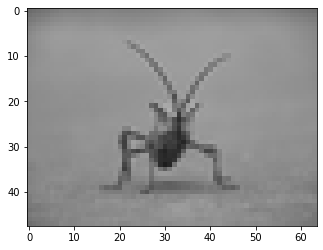

In [18]:
from PIL import Image

img = Image.open(r'stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS) # 适当调整图像大小
imgplot = plt.imshow(img)

这里我们使用的是默认的插值方法——双线性(bilinear)插值，因为我们没有给`imshow()`任何关于插值的参数。

让我们试试其他的方法。下面用的是最邻近（nearest），也就是不计算插值的方法。

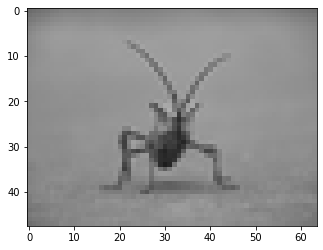

In [19]:
imgplot = plt.imshow(img, interpolation='nearest')

以及双三次插值（BiCubic）：

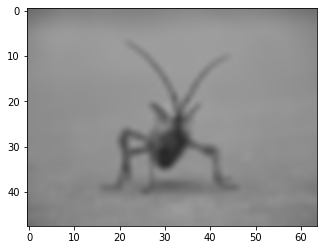

In [20]:
imgplot = plt.imshow(img, interpolation="bicubic")

双三次插值经常被用于将图像大小调大——比起像素风，人会更喜欢模糊的风格。